# LEVEL 2 TASK 4

# Task 4: Restaurant Chains
    1. Identify if there are any restaurant chains present in the dataset.
    2. Analyze the ratings and popularity of different restaurant chains.


In [26]:
# Import library files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('Dataset.csv')
data


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [27]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# 1. Identify if there are any restaurant chains present in the dataset.

In [28]:

# Group the dataset by 'Restaurant Name' and count the occurrences
restaurant_counts = data['Restaurant Name'].value_counts()

# Set a threshold for what constitutes a chain (e.g., appearing more than once)
chain_threshold = 10  # Adjust this threshold as needed

# Filter the dataset to include only restaurants that meet the threshold
chain_restaurants = data[data['Restaurant Name'].isin(restaurant_counts[restaurant_counts >= chain_threshold].index)]

# Display the restaurant chains
print(chain_restaurants[['Restaurant Name', 'City']])



      Restaurant Name       City
587   Barbeque Nation      Dubai
613         Pizza Hut    Sharjah
640     Pind Balluchi       Agra
641         Pizza Hut       Agra
671               KFC  Allahabad
...               ...        ...
9248      Burger King   Varanasi
9256        Pizza Hut      Vizag
9257        Pizza Hut      Vizag
9262  Barbeque Nation      Vizag
9538        Starbucks  ��stanbul

[946 rows x 2 columns]


# 2. Analyze the ratings and popularity of different restaurant chains.

In [29]:
# Calculate the average rating and total votes for each restaurant chain
chain_stats = data.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',  # Average rating
    'Votes': 'sum'  # Total number of votes
})

# Sort the chains by average rating in descending order and reset the index
chain_stats = chain_stats.sort_values(by='Aggregate rating', ascending=False).reset_index()

# Display the top 10 restaurant chains by average rating and total votes
top_10_chains = chain_stats.head(10)
print("Top 10 restaurant chains by average rating and total votes:")
print(top_10_chains)


Top 10 restaurant chains by average rating and total votes:
                  Restaurant Name  Aggregate rating  Votes
0  Restaurant Mosaic @ The Orient               4.9     85
1                Ministry of Crab               4.9    203
2                           Miann               4.9    281
3         Shorts Burger and Shine               4.9    820
4                           Milse               4.9    754
5                 Yellow Dog Eats               4.9   1252
6                   Duck & Waffle               4.9    706
7                    Gaga Manjero               4.9     95
8                 Mirchi And Mime               4.9   3244
9   McGuire's Irish Pub & Brewery               4.9   2238


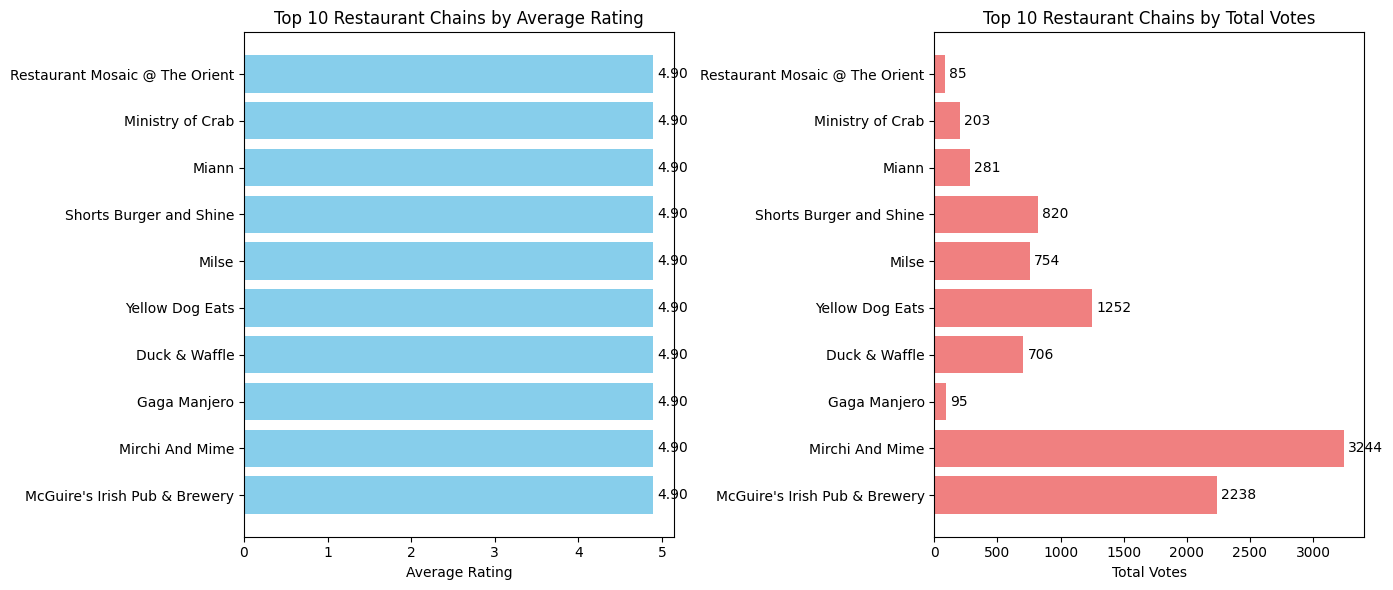

In [30]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the average ratings on the left subplot (ax1)
bars1 = ax1.barh(top_10_chains['Restaurant Name'], top_10_chains['Aggregate rating'], color='skyblue')
ax1.set_xlabel('Average Rating')
ax1.set_title('Top 10 Restaurant Chains by Average Rating')
ax1.invert_yaxis()  # Invert the y-axis for better readability

# Annotate the bars with their values
for bar in bars1:
    width = bar.get_width()
    ax1.annotate(f'{width:.2f}', xy=(width, bar.get_y() + bar.get_height() / 2), xytext=(3, 0), 
                textcoords='offset points', ha='left', va='center')

# Plot the total votes on the right subplot (ax2)
bars2 = ax2.barh(top_10_chains['Restaurant Name'], top_10_chains['Votes'], color='lightcoral')
ax2.set_xlabel('Total Votes')
ax2.set_title('Top 10 Restaurant Chains by Total Votes')
ax2.invert_yaxis()  # Invert the y-axis for better readability

# Annotate the bars with their values
for bar in bars2:
    width = bar.get_width()
    ax2.annotate(f'{int(width)}', xy=(width, bar.get_y() + bar.get_height() / 2), xytext=(3, 0),
                textcoords='offset points', ha='left', va='center')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()
